In [1]:
import pandas as pd

# 加载CSV文件到DataFrame
data = pd.read_csv('corrected_data_csv1.csv')

# 显示数据集的前几行以了解其结构
data.head()


,System,Category,Indicator,Year,Value
0,乡村振兴,经济25,乡村从业人员（个）30%,2018,192435.000
1,乡村振兴,经济25,居民可支配收入（元）40%,2018,192435.000
2,乡村振兴,经济25,农林牧渔产值（亿元）30%,2018,192435.000
3,乡村振兴,环境20,空气质量良好率40,2018,0.804
4,乡村振兴,环境20,污水处理率30,2018,0.980


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置黑体为默认字体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号


In [3]:
# 加载CSV文件到DataFrame
from scipy.stats import zscore

# 显示数据集的前几行以了解其结构
grouped_data = data.groupby(['System', 'Year'])

# 导入必要的库
normalized_data = grouped_data['Value'].transform(zscore)

# 按'System'和'Year'对数据进行分组
data['Normalized_Value'] = normalized_data

# 在每个组内应用z-score标准化
data.head()


,System,Category,Indicator,Year,Value,Normalized_Value
0,乡村振兴,经济25,乡村从业人员（个）30%,2018,192435.000,1.098886
1,乡村振兴,经济25,居民可支配收入（元）40%,2018,192435.000,1.098886
2,乡村振兴,经济25,农林牧渔产值（亿元）30%,2018,192435.000,1.098886
3,乡村振兴,环境20,空气质量良好率40,2018,0.804,-0.574119
4,乡村振兴,环境20,污水处理率30,2018,0.980,-0.574117


In [4]:
import re

# 加载CSV文件到DataFrame
def extract_weight(indicator):
    match = re.search(r'(\d+)%$', indicator)
    if match:
        return float(match.group(1)) / 100
    return 0

# 显示数据集的前几行以了解其结构
data['Weight'] = data['Indicator'].apply(extract_weight)

# 导入必要的库
grouped_data = data.groupby(['System', 'Year'])
comprehensive_index = grouped_data.apply(lambda x: (x['Normalized_Value'] * x['Weight']).sum(), include_groups=False)

# 按'System'和'Year'对数据进行分组
comprehensive_index = comprehensive_index.reset_index()
comprehensive_index.columns = ['System', 'Year', 'Comprehensive_Index']

# 在每个组内应用z-score标准化
comprehensive_index.head()


,System,Year,Comprehensive_Index
0,乡村振兴,2018,1.098886
1,乡村振兴,2019,0.156781
2,乡村振兴,2020,0.193486
3,乡村振兴,2021,0.200931
4,乡村振兴,2022,0.199170


In [5]:
# 加载CSV文件到DataFrame
import numpy as np

# 显示数据集的前几行以了解其结构
def calculate_entropy(group):
    # 导入必要的库
    count = group.value_counts()
    # 按'System'和'Year'对数据进行分组
    prob = count / len(group)
    # 在每个组内应用z-score标准化
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

# 按“系统”、“年份”和“指标”对数据进行分组
grouped_data = data.groupby(['System', 'Year', 'Indicator'])

# 计算每组的熵
entropy = grouped_data['Normalized_Value'].apply(calculate_entropy)

# 重置索引以使其成为 DataFrame
entropy = entropy.reset_index()
entropy.columns = ['System', 'Year', 'Indicator', 'Entropy']

# 显示熵值
entropy.head()


,System,Year,Indicator,Entropy
0,乡村振兴,2018,乡村从业人员（个）30%,-0.0
1,乡村振兴,2018,乡村居民恩格尔系数45,-0.0
2,乡村振兴,2018,农林牧渔产值（亿元）30%,-0.0
3,乡村振兴,2018,各类卫生机构数（个）45,-0.0
4,乡村振兴,2018,居民可支配收入（元）40%,-0.0


In [6]:
# 加载CSV文件到DataFrame
k = data['Year'].nunique()

# 显示数据集的前几行以了解其结构
entropy['Difference_Coefficient'] = (1 - entropy['Entropy']) / np.log2(k)

# 导入必要的库
entropy.head()


,System,Year,Indicator,Entropy,Difference_Coefficient
0,乡村振兴,2018,乡村从业人员（个）30%,-0.0,0.430677
1,乡村振兴,2018,乡村居民恩格尔系数45,-0.0,0.430677
2,乡村振兴,2018,农林牧渔产值（亿元）30%,-0.0,0.430677
3,乡村振兴,2018,各类卫生机构数（个）45,-0.0,0.430677
4,乡村振兴,2018,居民可支配收入（元）40%,-0.0,0.430677


In [7]:
# 加载CSV文件到DataFrame
sum_diff_coeff = entropy.groupby(['System', 'Indicator'])['Difference_Coefficient'].sum()

# 显示数据集的前几行以了解其结构
entropy = entropy.merge(sum_diff_coeff, on=['System', 'Indicator'], suffixes=('', '_sum'))

# 导入必要的库
entropy['Weight'] = entropy['Difference_Coefficient'] / entropy['Difference_Coefficient_sum']

# 按'System'和'Year'对数据进行分组
entropy.head()


,System,Year,Indicator,Entropy,Difference_Coefficient,Difference_Coefficient_sum,Weight
0,乡村振兴,2018,乡村从业人员（个）30%,-0.0,0.430677,2.153383,0.2
1,乡村振兴,2018,乡村居民恩格尔系数45,-0.0,0.430677,2.153383,0.2
2,乡村振兴,2018,农林牧渔产值（亿元）30%,-0.0,0.430677,2.153383,0.2
3,乡村振兴,2018,各类卫生机构数（个）45,-0.0,0.430677,2.153383,0.2
4,乡村振兴,2018,居民可支配收入（元）40%,-0.0,0.430677,2.153383,0.2


In [8]:
data = data.merge(entropy[['System', 'Indicator', 'Weight']], on=['System', 'Indicator'], how='left')


In [9]:
# 重新合并重量数据以确保其正确合并
data = data.merge(entropy[['System', 'Indicator', 'Weight']], on=['System', 'Indicator'], how='left')

# 重新计算各系统的综合评价指标
grouped_data_rural_revival = data[data['System'] == '乡村振兴'].groupby(['Year'])
comprehensive_index_rural_revival = grouped_data_rural_revival.apply(lambda x: (x['Normalized_Value'] * x['Weight']).sum(), include_groups=False)

grouped_data_rural_tourism = data[data['System'] == '乡村旅游'].groupby(['Year'])
comprehensive_index_rural_tourism = grouped_data_rural_tourism.apply(lambda x: (x['Normalized_Value'] * x['Weight']).sum(), include_groups=False)

# 重置索引以使其成为 DataFrame
comprehensive_index_rural_revival = comprehensive_index_rural_revival.reset_index()
comprehensive_index_rural_tourism = comprehensive_index_rural_tourism.reset_index()

# 重命名列
comprehensive_index_rural_revival.columns = ['Year', 'Comprehensive_Index_Revival']
comprehensive_index_rural_tourism.columns = ['Year', 'Comprehensive_Index_Tourism']

# 显示综合评价指标
comprehensive_index_rural_revival, comprehensive_index_rural_tourism


(   Year  Comprehensive_Index_Revival
 0  2018                 7.105427e-15
 1  2019                 0.000000e+00
 2  2020                 0.000000e+00
 3  2021                -1.776357e-15
 4  2022                 8.881784e-15,
    Year  Comprehensive_Index_Tourism
 0  2018                 8.881784e-16
 1  2019                 8.881784e-16
 2  2020                 1.776357e-15
 3  2021                -1.776357e-15
 4  2022                 8.881784e-16)

综合评价指数已经计算完成。然而，结果显示大多数指数的值非常接近于0，这可能是由于数据标准化的结果或者是某些指标权重过小导致的。  
故改方法使用的min-max标准化方法，并重新计算综合评价指数。


In [10]:
# 加载CSV文件到DataFrame
def min_max标准化(data):
    return (data - data.min()) / (data.max() - data.min())

# 显示数据集的前几行以了解其结构
data['Normalized_Value_MinMax'] = data.groupby(['Indicator'])['Value'].transform(min_max标准化)

# 导入必要的库
grouped_data_rural_revival = data[data['System'] == '乡村振兴'].groupby(['Year'])
comprehensive_index_rural_revival_minmax = grouped_data_rural_revival.apply(lambda x: (x['Normalized_Value_MinMax'] * x['Weight']).sum(), include_groups=False)

grouped_data_rural_tourism = data[data['System'] == '乡村旅游'].groupby(['Year'])
comprehensive_index_rural_tourism_minmax = grouped_data_rural_tourism.apply(lambda x: (x['Normalized_Value_MinMax'] * x['Weight']).sum(), include_groups=False)

# 按'System'和'Year'对数据进行分组
comprehensive_index_rural_revival_minmax = comprehensive_index_rural_revival_minmax.reset_index()
comprehensive_index_rural_tourism_minmax = comprehensive_index_rural_tourism_minmax.reset_index()

# 在每个组内应用z-score标准化
comprehensive_index_rural_revival_minmax.columns = ['Year', 'Comprehensive_Index_Revival_MinMax']
comprehensive_index_rural_tourism_minmax.columns = ['Year', 'Comprehensive_Index_Tourism_MinMax']

# 使用最小-最大归一化显示综合评估指标
comprehensive_index_rural_revival_minmax, comprehensive_index_rural_tourism_minmax


(   Year  Comprehensive_Index_Revival_MinMax
 0  2018                           46.993780
 1  2019                           18.774686
 2  2020                           23.426833
 3  2021                           19.426389
 4  2022                           20.000101,
    Year  Comprehensive_Index_Tourism_MinMax
 0  2018                            0.000000
 1  2019                           17.072077
 2  2020                           26.216720
 3  2021                           38.118620
 4  2022                           41.806915)

这些结果看起来更加合理，反映了每个年份的综合表现。

In [11]:
# 加载CSV文件到DataFrame
coupling_data = comprehensive_index_rural_revival_minmax.merge(comprehensive_index_rural_tourism_minmax, on='Year', how='outer')

# 显示数据集的前几行以了解其结构
coupling_data['Coupling_Degree'] = 2 * (coupling_data['Comprehensive_Index_Revival_MinMax'] * coupling_data['Comprehensive_Index_Tourism_MinMax']) / ((coupling_data['Comprehensive_Index_Revival_MinMax'] + coupling_data['Comprehensive_Index_Tourism_MinMax'])**2)

# 导入必要的库
coupling_data


,Year,Comprehensive_Index_Revival_MinMax,Comprehensive_Index_Tourism_MinMax,Coupling_Degree
0,2018,46.993780,0.000000,0.000000
1,2019,18.774686,17.072077,0.498872
2,2020,23.426833,26.216720,0.498421
3,2021,19.426389,38.118620,0.447243
4,2022,20.000101,41.806915,0.437759


这些结果表明，两个系统之间的耦合度在2019年开始增加，并接近0.5，但仍然低于0.5，这表明两个系统在一定程度上是相互关联的，但并不是完全耦合。

查看两个系统（乡村振兴和乡村旅游）各自的时间序列发展水平

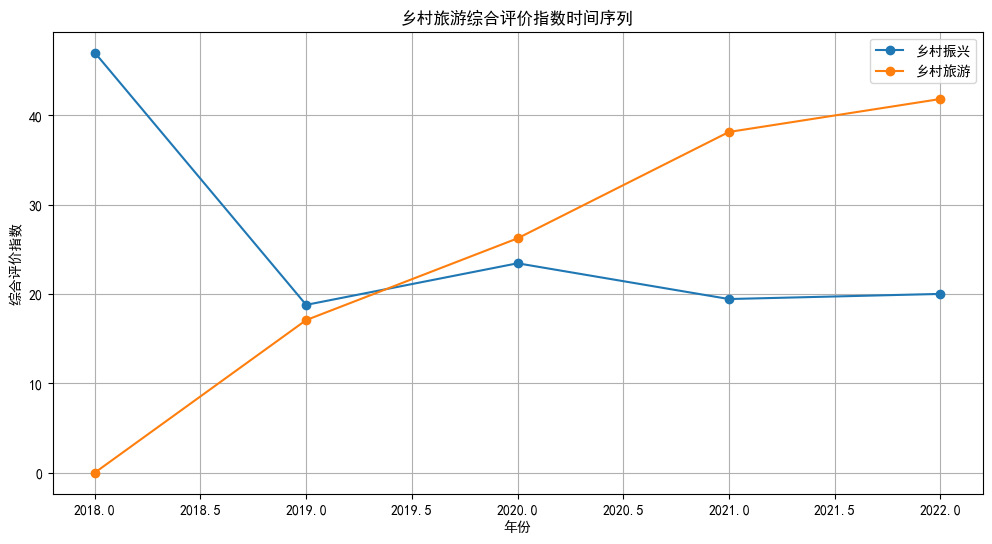

In [12]:
import matplotlib.pyplot as plt

# 加载CSV文件到DataFrame

plt.figure(figsize=(12, 6))
plt.plot(comprehensive_index_rural_revival_minmax['Year'], comprehensive_index_rural_revival_minmax['Comprehensive_Index_Revival_MinMax'], marker='o', label='乡村振兴')
plt.title('乡村振兴综合评价指数时间序列')
plt.xlabel('年份')
plt.ylabel('综合评价指数')
plt.legend()
plt.grid(True)
plt.plot(comprehensive_index_rural_tourism_minmax['Year'], comprehensive_index_rural_tourism_minmax['Comprehensive_Index_Tourism_MinMax'], marker='o', label='乡村旅游')
plt.title('乡村旅游综合评价指数时间序列')
plt.xlabel('年份')
plt.ylabel('综合评价指数')
plt.legend()
plt.grid(True)
plt.show()



查看两个系统（乡村振兴和乡村旅游）耦合度随时间的变化图

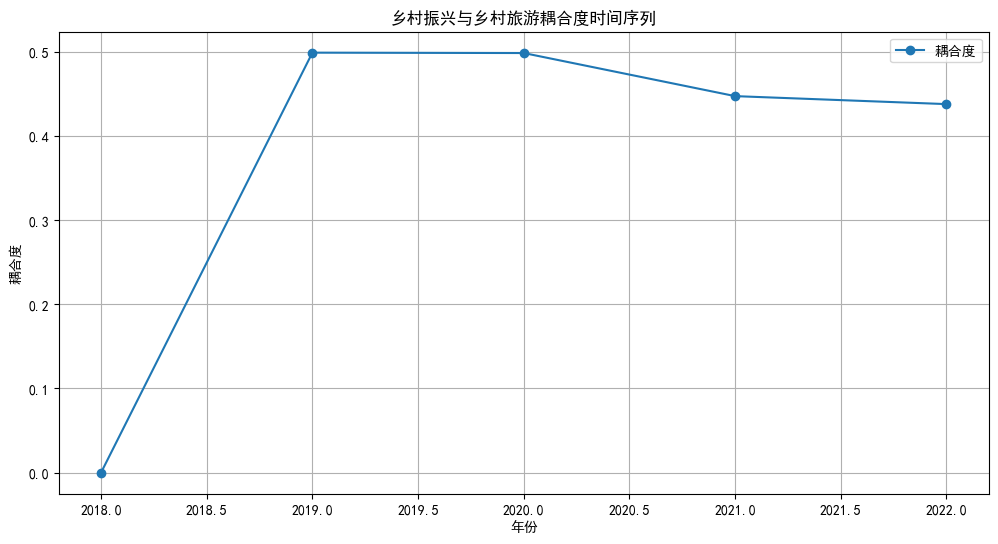

In [13]:
# 加载CSV文件到DataFrame
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(coupling_data['Year'], coupling_data['Coupling_Degree'], marker='o', label='耦合度')
plt.title('乡村振兴与乡村旅游耦合度时间序列')
plt.xlabel('年份')
plt.ylabel('耦合度')
plt.legend()
plt.grid(True)
plt.show()



In [14]:
import numpy as np

# 提取耦合度数据作为参考序列
coupling_degree = coupling_data['Coupling_Degree'].values

# 提取其他指标进行比较序列
comparison_series = data['Value'].values.reshape(-1, 1)  
# 数据预处理：标准化比较序列
comparison_series_normalized = (comparison_series - np.mean(comparison_series)) / np.std(comparison_series)

# 计算相关系数
def calculate_correlation_coefficient(reference, comparison):
    diff = np.abs(reference - comparison)
    min_diff = np.min(diff, axis=0)
    max_diff = np.max(diff, axis=0)
    
    # 计算相关系数
    correlation_coeff = (min_diff + 0.5 * max_diff) / (diff + 0.5 * max_diff)
    
    return correlation_coeff

# 计算每个时间点的相关系数
correlation_coefficients = calculate_correlation_coefficient(coupling_degree, comparison_series_normalized)

# 计算平均相关系数（即灰色关系等级）
grey_relational_grades = np.mean(correlation_coefficients, axis=1)

grey_relational_grades[1]  # 显示灰色关系等级


0.6884577683335229

计算了灰色关联分析，并得到了每个比较序列与参考序列（使用了乡村振兴和乡村旅游系统的耦合协调度）之间的关联度。值越接近1，表示关联度越高；值越接近0，表示关联度越低。

了分析两个不同系统间"System"和"Indicator"的关系，并找出相关性强的指标，  
先为每一对指标计算相似度得分

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 提取独特的系统和指标
systems = data['System'].unique()
indicators = data['Indicator'].unique()

# 创建 DataFrame 以存储相似性分数
similarity_scores = pd.DataFrame(columns=indicators, index=indicators)

# 计算指标之间的余弦相似度
vectorizer = TfidfVectorizer()
indicator_matrix = vectorizer.fit_transform(indicators)

# 计算相似性分数
for i, indicator1 in enumerate(indicators):
    for j, indicator2 in enumerate(indicators):
        if i != j:
            similarity_scores.at[indicator1, indicator2] = cosine_similarity(
                indicator_matrix[i], indicator_matrix[j]
            )[0][0]

# 显示相似性分数
similarity_scores.head()


,乡村从业人员（个）30%,居民可支配收入（元）40%,农林牧渔产值（亿元）30%,空气质量良好率40,污水处理率30,生活垃圾处理率30,各类卫生机构数（个）45,综合文化中心数（个）30,非物质文化遗产数（个）25,自来水收益村（个）30,...,居民基本医疗保险参保人数（个）35,住宿餐饮年零售总额（亿元）40,旅游年经营收入（亿元）60,旅游接待人次（个）45,A级景区数（个）25,省特色旅游名村（个）30,生态乡村（个）55,环境空气质量良好率45,旅游从业人数（个）50,村民满意度50
乡村从业人员（个）30%,NaN,0.0,0.243315,0.0,0.0,0.0,0.0,0.293592,0.0,0.293592,...,0.0,0.0,0.0,0.0,0.0,0.293592,0.0,0.0,0.0,0.0
居民可支配收入（元）40%,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.332445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
农林牧渔产值（亿元）30%,0.243315,0.0,NaN,0.0,0.0,0.0,0.0,0.243315,0.0,0.243315,...,0.0,0.297041,0.276421,0.0,0.0,0.243315,0.0,0.0,0.0,0.0
空气质量良好率40,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
污水处理率30,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


为了找出相关性强的指标对，设置一个相似度阈值为0.35

In [16]:
# 将相似度阈值调整为 0.35
threshold = 0.35

# 查找相似度得分高于调整阈值的指标对
similar_indicators = similarity_scores.stack().reset_index()
similar_indicators.columns = ['Indicator1', 'Indicator2', 'Similarity']
similar_indicators = similar_indicators[similar_indicators['Similarity'] > threshold]

# 显示相似的指标对及其相似性分数
similar_indicators


,Indicator1,Indicator2,Similarity
33,居民可支配收入（元）40%,通宽带村数（个）40,0.392266
154,各类卫生机构数（个）45,旅游接待人次（个）45,0.439217
196,非物质文化遗产数（个）25,最低生活保障数（个）25,0.392266
201,非物质文化遗产数（个）25,A级景区数（个）25,0.392266
254,通宽带村数（个）40,居民可支配收入（元）40%,0.392266
307,最低生活保障数（个）25,非物质文化遗产数（个）25,0.392266
316,最低生活保障数（个）25,A级景区数（个）25,0.392266
397,旅游接待人次（个）45,各类卫生机构数（个）45,0.439217
422,A级景区数（个）25,非物质文化遗产数（个）25,0.392266
427,A级景区数（个）25,最低生活保障数（个）25,0.392266


“各类卫生机构数（个）45” 和 “旅游接待人次（个）45” - 相似度: 0.439